# Photoionization / radiative recombination + dielectronic recombination

- data:
  - photoionization: INASAN
  - radiative recombination: INASAN
  - dielectronic recombination: INASAN

In [1]:
import numpy as np

import lss

In [2]:
spectrum = lss.BlackBodyPlanck()
spectrum.temperature = 5778.0
spectrum.total_area = 1367.0

# spectrum = lss.SunGueymard()

# spectrum = lss.Kelt9Fossati()

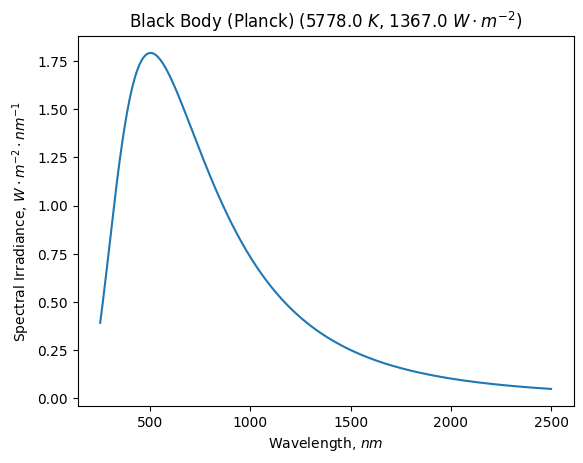

In [3]:
lss.plot_spectrum(
    spectrum,
    wavelengths=np.linspace(250, 2500, int(1e3)),
)

In [4]:
elements = [
    lss.O1Mashonkina(),
    lss.O2Mashonkina(),
]
# elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys
elements[0].keys = ["12P3P4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["12P1D4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["13S3S"]; elements[1].keys = ["22P4S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[1] = 1e-20
population_nlte_1[0] = 1.0 - population_nlte_1[1]
# population_nlte_1[0] = 0.0
# population_nlte_1[1] = 1.0

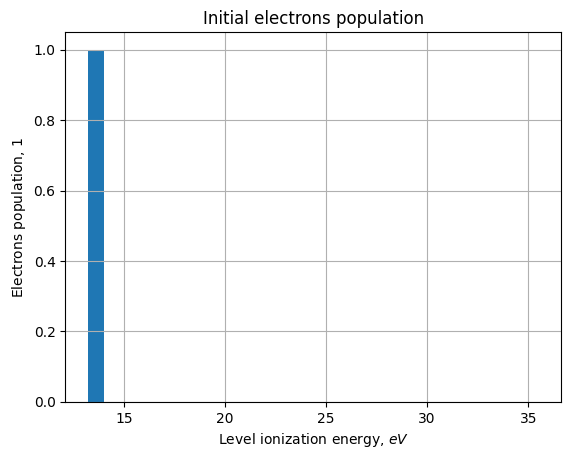

In [5]:
lss.plot_population(
    elements,
    population=population_nlte_1,
    title="Initial electrons population"
)

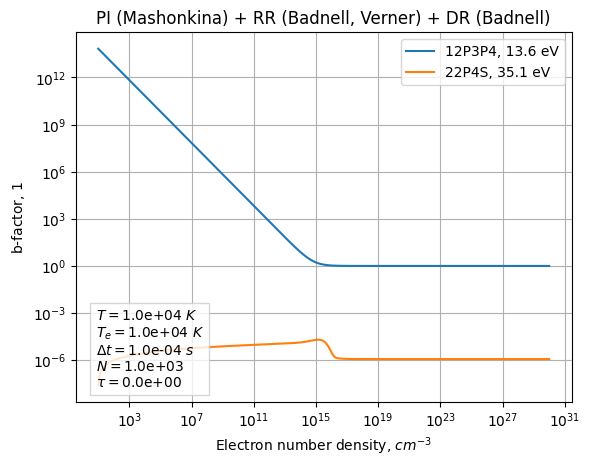

In [6]:
lss.plot_b_factor_electron_number_density(
    elements,
    population_nlte_1 = population_nlte_1,
    spectrum = spectrum,
    charge_transfer_elements = [],
    temperature = 1.0e4,
    electron_temperature = 1.0e4,
    electron_number_densities = np.geomspace(1.0e1, 1.0e30, num=int(1e3)),
    optical_depth = 0.0,
    delta_time = 1.0e-4,
    transitions_types = [
        lss.Transition.PI_MASHONKINA_O1,
        lss.Transition.RR_BADNELL_VERNER,
        lss.Transition.DR_BADNELL,
    ],
    legend_1_loc = 'upper right',
    legend_2_loc = 'lower left',
)